In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from data_exploration import load_from_csv

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
df = load_from_csv("new_dataset_07.csv")
df.head()

,ht_1,age_1,rank_1,rank_points_1,h2h_ratio_1,h2h_ace_1,h2h_df_1,h2h_1st_in_1,h2h_1st_win_1,h2h_2nd_win_1,...,avg_2nd_win_2,avg_serve_win_2,avg_break_saved_2,avg_break_lost_2,avg_return_win_2,avg_ace_faced_2,avg_break_win_2,avg_points_win_2,outcome,date
0,190.0,21.248460,NaN,NaN,1.0,0.119048,0.031746,0.714286,0.788889,0.611111,...,0.531398,0.680431,0.682267,0.126283,0.292679,0.080111,0.016326,0.489698,1,2005-01-03
1,188.0,29.861739,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.466806,0.570733,0.515202,0.334332,0.396094,0.048837,0.045416,0.485812,0,2005-01-03
2,188.0,21.585216,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.540817,0.661159,0.644712,0.160061,0.381827,0.057995,0.036744,0.518903,0,2005-01-03
3,183.0,25.563313,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.542759,0.659131,0.659824,0.159655,0.352238,0.100359,0.026422,0.505383,0,2005-01-03
4,183.0,24.996578,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.489701,0.592046,0.492084,0.314254,0.362174,0.059431,0.036502,0.477865,0,2005-01-03


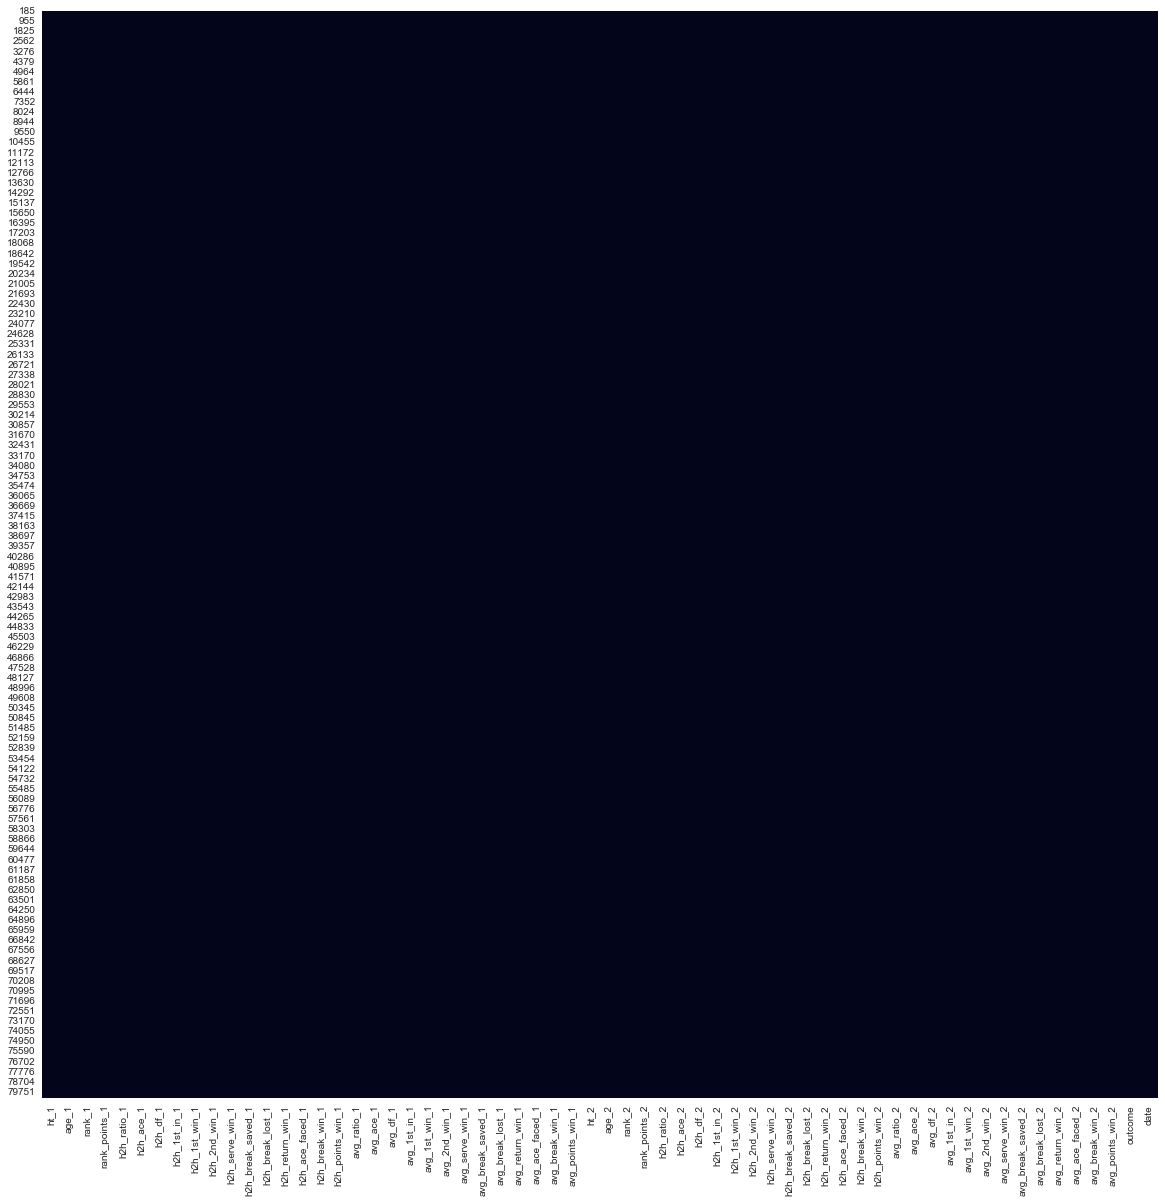

In [4]:
# Display Missing Values
plt.subplots(figsize=(20, 20))
sns.heatmap(df.isnull(), cbar=False)

In [7]:
# Keep avg_stats + infos
cols = ['outcome', 'age_1', 'rank_1', 'rank_points_1', 'age_2', 'rank_2', 'rank_points_2' ] + [col for col in df if col.startswith('avg')]

target_df = df[cols]
print("Before drop NA: {}".format(target_df.shape))
target_df = target_df.replace([np.inf, -np.inf], 0)
target_df = target_df.dropna()
print("After drop NA: {}".format(target_df.shape))

Before drop NA: (80488, 33)
After drop NA: (74490, 33)


In [8]:
# Added feature: Completeness 
target_df["completeness_1"] = target_df.avg_serve_win_1 * target_df.avg_return_win_1
target_df["completeness_2"] = target_df.avg_serve_win_2 * target_df.avg_return_win_2

# Added feature: Serve Advantage 
target_df["serve_adv_1"] = target_df.avg_serve_win_1 - target_df.avg_return_win_2
target_df["serve_adv_2"] = target_df.avg_serve_win_2 - target_df.avg_return_win_1

# Differences between features
cols_1 = [col for col in target_df if col.endswith('1')] # Player 1
cols_2 = [col for col in target_df if col.endswith('2')] # Player 2

cols = [col[0:-2] for col in cols_1] # Final cols


diff = target_df[cols_1].values - target_df[cols_2].values

final_df = pd.DataFrame(diff, columns=cols)

In [11]:
X, y = final_df, target_df["outcome"] 
X.head()


,age,rank,rank_points,avg_ratio,avg_ace,avg_df,avg_1st_in,avg_1st_win,avg_2nd_win,avg_serve_win,avg_break_saved,avg_break_lost,avg_return_win,avg_ace_faced,avg_break_win,avg_points_win,completeness,serve_adv
0,0.832307,-2.0,17.0,-0.061111,-0.014333,0.000219,0.098998,-0.033569,-0.020602,-0.008201,-0.040248,0.017962,0.009533,0.023330,0.003204,-0.000969,0.002725,0.001332
1,-0.832307,2.0,-17.0,0.061111,0.014333,-0.000219,-0.098998,0.033569,0.020602,0.008201,0.040248,-0.017962,-0.009533,-0.023330,-0.003204,0.000969,-0.002725,-0.001332
2,3.753593,-53.0,757.0,0.128804,0.019234,0.012047,-0.041603,0.028379,0.064561,0.035467,0.029613,-0.080372,0.005877,-0.000502,0.001558,0.021443,0.017429,0.041343
3,-3.753593,53.0,-757.0,-0.128804,-0.019234,-0.012047,0.041603,-0.028379,-0.064561,-0.035467,-0.029613,0.080372,-0.005877,0.000502,-0.001558,-0.021443,-0.017429,-0.041343
4,5.155373,-19.0,115.0,0.170142,-0.043756,0.003867,0.084231,-0.019549,-0.000853,0.005000,-0.037035,0.017870,-0.001926,-0.003964,-0.000954,0.000304,0.000754,0.003073


In [8]:
# Split train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
# Baseline Models
from sklearn.metrics import accuracy_score

# Always predict the better ranked player as winner
y_pred = np.where(X_test.rank_points > 0, 1, 0)

score = accuracy_score(y_test.values.ravel(), y_pred)
print("Accuracy Baseline Model rank-based : {}".format(score))

Accuracy Baseline Model rank-based : 0.6841397849462365


In [10]:
# Logistic regression for all stats
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', penalty='l2', C=100000).fit(X_train, y_train.values.ravel())
score = clf.score(X_test, y_test.values.ravel())

print("Accuracy Logistic Regression full stats : {}".format(score))

Accuracy Logistic Regression full stats : 0.6984767025089605


In [92]:
training_score = clf.score(X_train, y_train.values.ravel())
print(clf.coef_)
print(training_score)

[[-0.1356493  -0.30052725  0.44339582  0.15582459  0.17202754  0.00316837
   0.07862026  0.13414395  0.09964605 -0.25109323 -0.00686001  0.18603692
  -0.59855822 -0.0246506  -0.02312038  0.4186735   1.2683478  -0.63600517]]
0.6874580480601423


In [11]:
# Logistic regression for selected stats
from sklearn.linear_model import LogisticRegression

features = ['rank_points', 'avg_points_win', 'serve_adv', 'avg_ratio', 'completeness']

clf = LogisticRegression(solver='lbfgs', penalty='l2').fit(X_train[features], y_train.values.ravel())
score = clf.score(X_test[features], y_test.values.ravel())

print("Accuracy Logistic Regression selected stats : {}".format(score))

Accuracy Logistic Regression selected stats : 0.6842891278375149


In [12]:
# Scaled logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


clf = LogisticRegression(penalty='l1', C=1000).fit(X_train, y_train.values.ravel())
score = clf.score(X_test, y_test.values.ravel())

print("Accuracy Logistic Regression scaled stats : {}".format(score))
print(clf.coef_)

Accuracy Logistic Regression scaled stats : 0.6917562724014337
[[-0.17706577 -0.13192268  0.33311616  0.04832341  0.17893136  0.05154445
  -0.05452406 -0.2852076  -0.02736295  0.18085867 -0.06487106 -0.31387168
   0.2370608  -0.0260652   0.10129928  0.20789951 -0.31856298  0.52189939]]


In [13]:
# RFE for Logistic Regression with scaled features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


X_scaled = pd.DataFrame(preprocessing.scale(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)




model = LogisticRegression(solver='lbfgs', penalty='l2')
rfe = RFE(model)
fit = rfe.fit(X_train, y_train.values.ravel())


print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(X_train.columns[fit.support_])) 
print("Feature Ranking: {}".format(fit.ranking_)) 


score = fit.score(X_test, y_test.values.ravel())

print("Accuracy Logistic Regression Scaled RFE : {}".format(score))


Num Features: 9
Selected Features: Index(['age', 'rank', 'rank_points', 'avg_serve_win', 'avg_break_lost',
       'avg_return_win', 'avg_points_win', 'completeness', 'serve_adv'],
      dtype='object')
Feature Ranking: [ 1  1  1  6  3  7  8  4 10  1  5  1  1  9  2  1  1  1]
Accuracy Logistic Regression Scaled RFE : 0.6942951015531661


In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=10).fit(X_train, y_train.values.ravel())
score = rf.score(X_test, y_test.values.ravel())

print("Accuracy Random Forests: {}".format(score))

Accuracy Random Forests: 0.6932497013142175


In [15]:
training_score = rf.score(X_train, y_train.values.ravel())
print(training_score)

0.7648222819593787


([<matplotlib.axis.XTick at 0x1a1c2af748>,
 <a list of 18 Text xticklabel objects>)

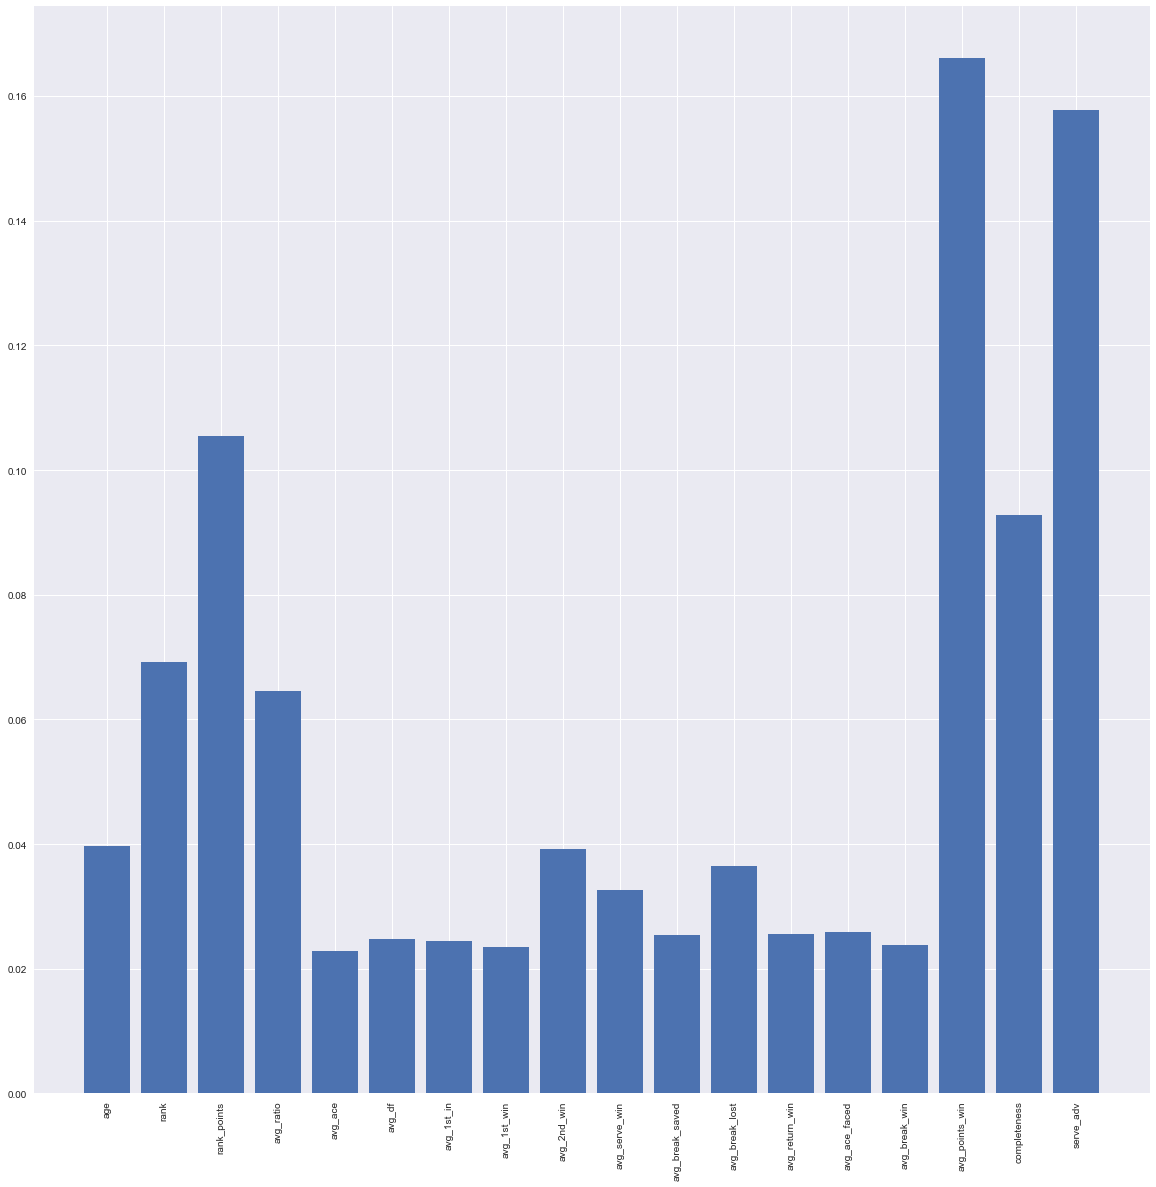

In [16]:
# Features importance
y_pos = range(X_train.shape[1])

plt.subplots(figsize=(20, 20))
plt.bar(y_pos, rf.feature_importances_)

plt.xticks(y_pos, X_train.columns, rotation=90)

In [17]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train.values.ravel())
score = clf.score(X_test, y_test.values.ravel())

print("Accuracy AdaBoost: {}".format(score))

Accuracy AdaBoost: 0.6880227001194743


In [89]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features=16, max_depth = None, random_state = 0)
    gb.fit(X_train_scale, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_scale, y_test)))
    print()




KeyboardInterrupt: 

In [18]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train.values.ravel())
score = clf.score(X_test, y_test.values.ravel())

print("Accuracy SGD: {}".format(score))

Accuracy SGD: 0.678763440860215


In [19]:
# Stacking
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier 

rf = RandomForestClassifier(n_estimators=1000, max_depth=10)
lr = LogisticRegression(solver='lbfgs', penalty='l2', C=100)
gb = GradientBoostingClassifier(n_estimators=100)
ab = AdaBoostClassifier(n_estimators=100)



eclf = VotingClassifier(estimators=[
    ('rf', rf), ('lr', lr), ('ab', ab), ('gb', gb)], voting='soft')

eclf.fit(X_train, y_train.values.ravel())

score = eclf.score(X_test, y_test.values.ravel())

print("Accuracy Majority: {}".format(score))

KeyboardInterrupt: 